In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from pprint import pprint
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt
import re, string

In [2]:
url = "https://www.themoscowtimes.com/"

In [3]:
response = requests.get(url+"news")
soup = BeautifulSoup(response.text, "html.parser")

titles_container = soup.findAll('h3', {'class': 'article-excerpt-default__headline'})
titles_info = [title.text.replace("\n","").replace("\t","").replace("\\ ", "") for title in titles_container]

pprint(titles_info)

['Russia Will Help Iran With Oil If Payment Channel Not Launched, Official '
 'Says',
 'Russians Are Losing Interest in Foreign Policy, Poll Says',
 'Russian Hermit Seeks Peace in Remote Siberia',
 'Georgian Parliament Leader Resigns Over Mass Anti-Russian Protests',
 'Russia Accuses U.S. of Pushing Iran Situation to Brink of War',
 'Chechen Human Rights Leader Titiyev Released From Prison, 18 Months After '
 'Arrest',
 '‘Russia Is Our Enemy’: The Reactions to Anti-Russian Protests in Georgia',
 'EU Extends Economic Sanctions on Russia Until 2020',
 "Georgians Angry Over Russian Lawmaker's Visit Try to Storm Parliament",
 '‘Like Pre-Revolutionary Pogroms’: Ethnic Conflicts on the Rise in Russia',
 'Crowds of Protesters Set Up Camp Against Landfill in Russia’s North',
 'Russia Starts Freeing Captive Belugas From ‘Whale Prison,’ Reports Say',
 "The Key Quotes of Putin's Annual Question and Answer Session",
 'Protesters Support Teenage Sisters Charged With Murder for Killing Abusive '
 'F

In [4]:
response = requests.get(url+"opinion")
titles_info = str(titles_info) + str([title.text.replace("\n","").replace("\t","").replace("\\ ", "") for title in titles_container])

pprint(titles_info)

("['Russia Will Help Iran With Oil If Payment Channel Not Launched, Official "
 "Says', 'Russians Are Losing Interest in Foreign Policy, Poll Says', 'Russian "
 "Hermit Seeks Peace in Remote Siberia', 'Georgian Parliament Leader Resigns "
 "Over Mass Anti-Russian Protests', 'Russia Accuses U.S. of Pushing Iran "
 "Situation to Brink of War', 'Chechen Human Rights Leader Titiyev Released "
 "From Prison, 18 Months After Arrest', '‘Russia Is Our Enemy’: The Reactions "
 "to Anti-Russian Protests in Georgia', 'EU Extends Economic Sanctions on "
 'Russia Until 2020\', "Georgians Angry Over Russian Lawmaker\'s Visit Try to '
 'Storm Parliament", \'‘Like Pre-Revolutionary Pogroms’: Ethnic Conflicts on '
 "the Rise in Russia', 'Crowds of Protesters Set Up Camp Against Landfill in "
 "Russia’s North', 'Russia Starts Freeing Captive Belugas From ‘Whale Prison,’ "
 'Reports Say\', "The Key Quotes of Putin\'s Annual Question and Answer '
 'Session", \'Protesters Support Teenage Sisters Charged Wi

In [5]:
response = requests.get(url+"business")
titles_info = str(titles_info) + str([title.text.replace("\n","").replace("\t","").replace("\\ ", "") for title in titles_container])

pprint(titles_info)

("['Russia Will Help Iran With Oil If Payment Channel Not Launched, Official "
 "Says', 'Russians Are Losing Interest in Foreign Policy, Poll Says', 'Russian "
 "Hermit Seeks Peace in Remote Siberia', 'Georgian Parliament Leader Resigns "
 "Over Mass Anti-Russian Protests', 'Russia Accuses U.S. of Pushing Iran "
 "Situation to Brink of War', 'Chechen Human Rights Leader Titiyev Released "
 "From Prison, 18 Months After Arrest', '‘Russia Is Our Enemy’: The Reactions "
 "to Anti-Russian Protests in Georgia', 'EU Extends Economic Sanctions on "
 'Russia Until 2020\', "Georgians Angry Over Russian Lawmaker\'s Visit Try to '
 'Storm Parliament", \'‘Like Pre-Revolutionary Pogroms’: Ethnic Conflicts on '
 "the Rise in Russia', 'Crowds of Protesters Set Up Camp Against Landfill in "
 "Russia’s North', 'Russia Starts Freeing Captive Belugas From ‘Whale Prison,’ "
 'Reports Say\', "The Key Quotes of Putin\'s Annual Question and Answer '
 'Session", \'Protesters Support Teenage Sisters Charged Wi

In [6]:
response = requests.get(url+"arts-and-life")
titles_info = str(titles_info) + str([title.text.replace("\n","").replace("\t","").replace("\\ ", "") for title in titles_container])

pprint(titles_info)

("['Russia Will Help Iran With Oil If Payment Channel Not Launched, Official "
 "Says', 'Russians Are Losing Interest in Foreign Policy, Poll Says', 'Russian "
 "Hermit Seeks Peace in Remote Siberia', 'Georgian Parliament Leader Resigns "
 "Over Mass Anti-Russian Protests', 'Russia Accuses U.S. of Pushing Iran "
 "Situation to Brink of War', 'Chechen Human Rights Leader Titiyev Released "
 "From Prison, 18 Months After Arrest', '‘Russia Is Our Enemy’: The Reactions "
 "to Anti-Russian Protests in Georgia', 'EU Extends Economic Sanctions on "
 'Russia Until 2020\', "Georgians Angry Over Russian Lawmaker\'s Visit Try to '
 'Storm Parliament", \'‘Like Pre-Revolutionary Pogroms’: Ethnic Conflicts on '
 "the Rise in Russia', 'Crowds of Protesters Set Up Camp Against Landfill in "
 "Russia’s North', 'Russia Starts Freeing Captive Belugas From ‘Whale Prison,’ "
 'Reports Say\', "The Key Quotes of Putin\'s Annual Question and Answer '
 'Session", \'Protesters Support Teenage Sisters Charged Wi

In [7]:
response = requests.get(url+"meanwhile")
titles_info = str(titles_info) + str([title.text.replace("\n","").replace("\t","").replace("\\ ", "") for title in titles_container])

pprint(titles_info)

("['Russia Will Help Iran With Oil If Payment Channel Not Launched, Official "
 "Says', 'Russians Are Losing Interest in Foreign Policy, Poll Says', 'Russian "
 "Hermit Seeks Peace in Remote Siberia', 'Georgian Parliament Leader Resigns "
 "Over Mass Anti-Russian Protests', 'Russia Accuses U.S. of Pushing Iran "
 "Situation to Brink of War', 'Chechen Human Rights Leader Titiyev Released "
 "From Prison, 18 Months After Arrest', '‘Russia Is Our Enemy’: The Reactions "
 "to Anti-Russian Protests in Georgia', 'EU Extends Economic Sanctions on "
 'Russia Until 2020\', "Georgians Angry Over Russian Lawmaker\'s Visit Try to '
 'Storm Parliament", \'‘Like Pre-Revolutionary Pogroms’: Ethnic Conflicts on '
 "the Rise in Russia', 'Crowds of Protesters Set Up Camp Against Landfill in "
 "Russia’s North', 'Russia Starts Freeing Captive Belugas From ‘Whale Prison,’ "
 'Reports Say\', "The Key Quotes of Putin\'s Annual Question and Answer '
 'Session", \'Protesters Support Teenage Sisters Charged Wi

In [8]:
def replace_punctuation (text, replace):
      return re.sub("[%s]" % re.escape(string.punctuation), replace, text)

titles_info = replace_punctuation(str(titles_info), "")
titles_info = titles_info.lower()

In [9]:
#titles_info = titles_info.replace(r"[’|‘]", "")

All frequencies, excluding stopwords:
           Word  Frequency
0        russia         36
1          says         25
2             ’         20
3      russians         15
4             ‘         15
5         putin         15
6          iran         10
7           oil         10
8       russian         10
9    parliament         10
10       leader         10
11  antirussian         10
12     protests         10
13       prison         10
14           eu         10


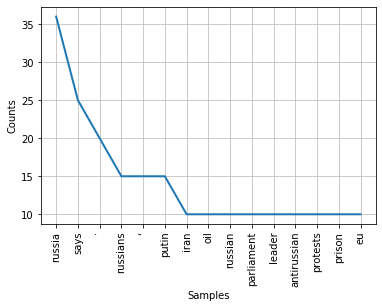

In [10]:
top_N = 15

txt = titles_info
words = nltk.tokenize.word_tokenize(txt)
word_dist = nltk.FreqDist(words)

stopwords = nltk.corpus.stopwords.words("english")
words_except_stop_dist = nltk.FreqDist(word for word in words if word not in stopwords)

print("All frequencies, excluding stopwords:")
print("=" * 28)
rslt = pd.DataFrame(words_except_stop_dist.most_common(top_N), columns = ["Word", "Frequency"])

#rslt.drop(rslt[rslt.Word == "russia"].index, inplace = True)
#rslt.drop(rslt[rslt.Word == "russians"].index, inplace = True)
#rslt.drop(rslt[rslt.Word == "russian"].index, inplace = True)
#rslt.drop(rslt[rslt.Word == "says"].index, inplace = True)
#rslt.drop(rslt[rslt.Word == "help"].index, inplace = True)
      
print(rslt)
print("=" * 28)

words_except_stop_dist.plot(top_N)